### 《Python机器学习时间指南》[美]Alexander T. Combs著.黄申.翻译.人民邮电出版社.201705
* [Alexander T. Combs's GitHub](https://github.com/acombs)

> 第7章 使用机器学习预测股票市场

> 7.3 如何开发一个交易策略，P166

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
def SZ_ETF(stock):
    stock = stock.set_index('date')
    stock.index = pd.to_datetime(stock.index)
    stock = stock.sort_index(axis=0, ascending=True)
    stadate = '2012-06-01'
    enddate = '2018-06-08'
    stock = stock[pd.to_datetime(stock.index) >= pd.to_datetime(stadate)]
    stock = stock[pd.to_datetime(stock.index) <= pd.to_datetime(enddate)]
    stock['yesterday_close'] = stock['close'].shift(1)
    stock.loc[0:1,'yesterday_close'] = stock['open']
    stock['range'] = (stock['close']-stock['yesterday_close'])/stock['yesterday_close']
    stock['amplitude'] = (stock['high']-stock['low'])/stock['yesterday_close']
    return stock

In [3]:
# 300ETF(510300)
stock_300ETF = pd.read_csv('../ETF/data/510300.csv')
stock_300ETF = SZ_ETF(stock_300ETF)
stock_300ETF.tail()

,open,high,low,close,volume,amount,yesterday_close,range,amplitude
date,,,,,,,,,
2018-06-04,3.797,3.818,3.784,3.814,126079680,47968.090,3.777,0.009796,0.009002
2018-06-05,3.810,3.850,3.803,3.846,104886000,40123.789,3.814,0.008390,0.012323
2018-06-06,3.841,3.849,3.831,3.839,83502816,32063.799,3.846,-0.001820,0.004680
2018-06-07,3.853,3.869,3.831,3.838,109814320,42290.070,3.839,-0.000260,0.009898
2018-06-08,3.830,3.830,3.768,3.787,135333280,51353.004,3.838,-0.013288,0.016154


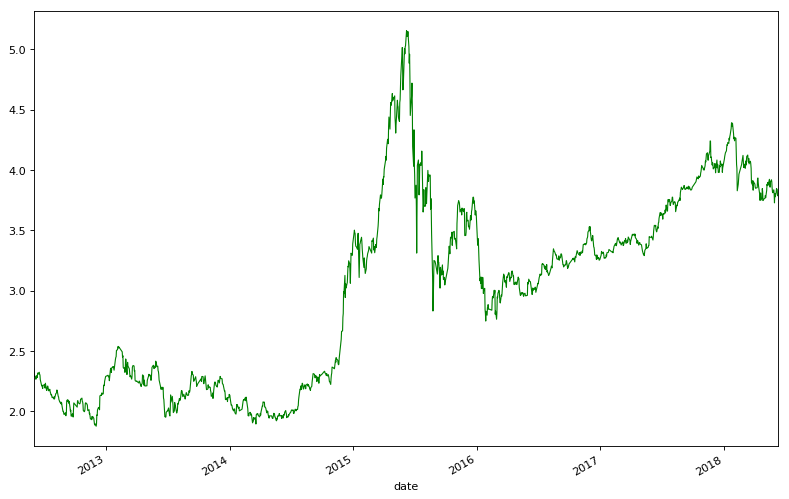

In [4]:
plt.figure(figsize=(12,8), dpi=80)
stock_300ETF['close'].plot(color='green', linewidth='1')
plt.show()

In [5]:
# 首个开盘日数据，P167
first_open = stock_300ETF['open'].iloc[0]
first_open

2.3609999999999998

In [6]:
# 最后一天收盘价，P167
last_close = stock_300ETF['close'].iloc[-1]
last_close

3.7869999999999999

In [7]:
# 整个时期的变化，P168
last_close - first_open

1.4260000000000002

In [8]:
(last_close - first_open)/first_open

0.60398136382888623

In [9]:
# 假设每天开盘时买入，收盘时卖出，P168
stock_300ETF['Daily_Change'] = stock_300ETF['close']-stock_300ETF['open']
# 整个时期的变化加和，P168
stock_300ETF['Daily_Change'].sum()

3.7060000000000057

In [10]:
# 盘中交易标准差，P169
np.std(stock_300ETF['Daily_Change'])

0.04966333692999414

In [11]:
# 隔夜交易及隔夜交易标准差，P169
stock_300ETF['Overnight_Change'] = stock_300ETF['open']-stock_300ETF['yesterday_close']
np.std(stock_300ETF['Overnight_Change'])

0.022607150116634684

↑ 隔夜交易与盘中交易相比具有较低的波动性。

In [12]:
# 下跌交易日的每日变化，P169
stock_300ETF[stock_300ETF['Daily_Change'] < 0]['Daily_Change'].mean()

-0.0284037089871612

In [13]:
# 下跌交易日的隔夜变化，P169
stock_300ETF[stock_300ETF['Overnight_Change'] < 0]['Overnight_Change'].mean()

-0.012148667601683026

↑ 隔夜交易策略的平均下降幅度小于盘中交易策略。

In [14]:
# 每日回报（今日收盘价-昨日收盘价）,P170
daily_rtn = (stock_300ETF['close']-stock_300ETF['yesterday_close'])/stock_300ETF['yesterday_close']*100

# 盘中回报（当日收盘价-开盘价）,P170
id_rtn = (stock_300ETF['close']-stock_300ETF['open'])/stock_300ETF['open']*100

# 隔夜回报（今日开盘价-昨日收盘价）,P170
on_rtn = (stock_300ETF['open']-stock_300ETF['yesterday_close'])/stock_300ETF['yesterday_close']*100

In [15]:
# 策略统计信息，P170
# encoding: utf-8
def get_stats(s, n=252):
    s = s.dropna()
    wins = len(s[s>0])
    losses = len(s[s<0])
    evens = len(s[s==0])
    mean_w = round(s[s>0].mean(), 3)
    mean_l = round(s[s<0].mean(), 3)
    win_r = round(wins/losses, 3)
    mean_trd = round(s.mean(), 3)
    sd = round(np.std(s), 3)
    max_l = round(s.min(), 3)
    max_w = round(s.max(), 3)
    sharpe_r = round((s.mean()/np.std(s))*np.sqrt(n), 4)
    cnt = len(s)
    print '交易次数(Trades)：',cnt
    print '盈利次数(nWins)：',wins
    print '亏损次数(nLosses)：',losses
    print '盈亏平衡次数(nBreakeven)：',evens
    print '盈利/亏损比例(nWin/nLoss_Radio)：',win_r
    print '盈利的平均值(nMean_Win)：',mean_w
    print '亏损的平均值(nMean_Loss)：',mean_l
    print '平均收益(nMean)：',mean_trd
    print '标准差(nStd_Dev)：',sd
    print '最大亏损(nMax_Loss)：',max_l
    print '最大盈利(nMax_Win)：',max_w
    print '夏普比率(nSharpe_Ratio)：',sharpe_r

In [16]:
get_stats(daily_rtn)

交易次数(Trades)： 1466
盈利次数(nWins)： 731
亏损次数(nLosses)： 700
盈亏平衡次数(nBreakeven)： 35
盈利/亏损比例(nWin/nLoss_Radio)： 1.0
盈利的平均值(nMean_Win)： 1.105
亏损的平均值(nMean_Loss)： -1.057
平均收益(nMean)： 0.046
标准差(nStd_Dev)： 1.674
最大亏损(nMax_Loss)： -10.532
最大盈利(nMax_Win)： 10.45
夏普比率(nSharpe_Ratio)： 0.4394


In [17]:
get_stats(id_rtn)

交易次数(Trades)： 1466
盈利次数(nWins)： 739
亏损次数(nLosses)： 701
盈亏平衡次数(nBreakeven)： 26
盈利/亏损比例(nWin/nLoss_Radio)： 1.0
盈利的平均值(nMean_Win)： 1.054
亏损的平均值(nMean_Loss)： -0.913
平均收益(nMean)： 0.094
标准差(nStd_Dev)： 1.492
最大亏损(nMax_Loss)： -8.358
最大盈利(nMax_Win)： 11.903
夏普比率(nSharpe_Ratio)： 1.0034


In [18]:
get_stats(on_rtn)

交易次数(Trades)： 1466
盈利次数(nWins)： 593
亏损次数(nLosses)： 713
盈亏平衡次数(nBreakeven)： 160
盈利/亏损比例(nWin/nLoss_Radio)： 0.0
盈利的平均值(nMean_Win)： 0.356
亏损的平均值(nMean_Loss)： -0.396
平均收益(nMean)： -0.049
标准差(nStd_Dev)： 0.667
最大亏损(nMax_Loss)： -8.063
最大盈利(nMax_Win)： 10.327
夏普比率(nSharpe_Ratio)： -1.1587


In [19]:
stock_300ETF.tail()

,open,high,low,close,volume,amount,yesterday_close,range,amplitude,Daily_Change,Overnight_Change
date,,,,,,,,,,,
2018-06-04,3.797,3.818,3.784,3.814,126079680,47968.090,3.777,0.009796,0.009002,0.017,0.020
2018-06-05,3.810,3.850,3.803,3.846,104886000,40123.789,3.814,0.008390,0.012323,0.036,-0.004
2018-06-06,3.841,3.849,3.831,3.839,83502816,32063.799,3.846,-0.001820,0.004680,-0.002,-0.005
2018-06-07,3.853,3.869,3.831,3.838,109814320,42290.070,3.839,-0.000260,0.009898,-0.015,0.014
2018-06-08,3.830,3.830,3.768,3.787,135333280,51353.004,3.838,-0.013288,0.016154,-0.043,-0.008


> 使用支持向量回归，构建我们的模型，P175

In [20]:
for i in range(1, 21, 1):
    stock_300ETF.loc[:,'close_minus_'+str(i)] = stock_300ETF['close'].shift(i)
    stock_300ETF_close_20 = stock_300ETF[[x for x in stock_300ETF.columns if 'close_minus' in x or x == 'close']].iloc[21:,]

In [21]:
stock_300ETF_close_20.to_csv('stock_300ETF_close_20.csv')

In [22]:
stock_300ETF_close_20.tail().T

date,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00,2018-06-08 00:00:00
close,3.814,3.846,3.839,3.838,3.787
close_minus_1,3.777,3.814,3.846,3.839,3.838
close_minus_2,3.803,3.777,3.814,3.846,3.839
close_minus_3,3.727,3.803,3.777,3.814,3.846
close_minus_4,3.799,3.727,3.803,3.777,3.814
close_minus_5,3.835,3.799,3.727,3.803,3.777
close_minus_6,3.811,3.835,3.799,3.727,3.803
close_minus_7,3.820,3.811,3.835,3.799,3.727
close_minus_8,3.851,3.820,3.811,3.835,3.799
close_minus_9,3.902,3.851,3.820,3.811,3.835


In [23]:
# 首先，我们将颠倒这些列，从左到右为最早时间到最晚时间，P176
stock_300ETF_close_20 = stock_300ETF_close_20.iloc[:,::-1]
stock_300ETF_close_20.tail().T

date,2018-06-04 00:00:00,2018-06-05 00:00:00,2018-06-06 00:00:00,2018-06-07 00:00:00,2018-06-08 00:00:00
close_minus_20,3.831,3.881,3.870,3.896,3.873
close_minus_19,3.881,3.870,3.896,3.873,3.907
close_minus_18,3.870,3.896,3.873,3.907,3.922
close_minus_17,3.896,3.873,3.907,3.922,3.890
close_minus_16,3.873,3.907,3.922,3.890,3.857
close_minus_15,3.907,3.922,3.890,3.857,3.899
close_minus_14,3.922,3.890,3.857,3.899,3.918
close_minus_13,3.890,3.857,3.899,3.918,3.902
close_minus_12,3.857,3.899,3.918,3.902,3.851
close_minus_11,3.899,3.918,3.902,3.851,3.820


In [24]:
len(stock_300ETF_close_20)

1445

In [25]:
# 我们将导入支持向量机，并设置训练和测试矩阵，以及每个数据点的目标向量，P176
from sklearn.svm import SVR

In [26]:
clf = SVR(kernel = 'linear')
clf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
# 设置训练集，取前1000多个数据作为训练集
g = -400
x_train = stock_300ETF_close_20[:g]
y_train = stock_300ETF_close_20['close'].shift(-1)[:g]

In [28]:
len(x_train)

1045

In [29]:
len(y_train)

1045

In [30]:
y_train.tail()

date
2016-10-14    3.238
2016-10-17    3.280
2016-10-18    3.278
2016-10-19    3.273
2016-10-20    3.290
Name: close, dtype: float64

In [31]:
# 设置测试集，取400个数据作为测试集
x_test = stock_300ETF_close_20[g:]
y_test = stock_300ETF_close_20['close'].shift(-1)[g:]

In [32]:
len(x_test)

400

In [33]:
len(y_test)

400

In [34]:
y_test.tail()

date
2018-06-04    3.846
2018-06-05    3.839
2018-06-06    3.838
2018-06-07    3.787
2018-06-08      NaN
Name: close, dtype: float64

In [35]:
# 拟合模型，P176
model = clf.fit(x_train,y_train)
model

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [36]:
# 用测试集进行预测，P176
preds = model.predict(x_test)

In [37]:
# 实际数据与测数据的对比
tf = pd.DataFrame(list(zip(y_test, preds)), columns = ['Next_Day_Close','Predicted_Next_Close'], index = y_test.index)
tf = pd.concat([stock_300ETF_close_20['close'],tf], axis=1)
tf.tail()

,close,Next_Day_Close,Predicted_Next_Close
date,,,
2018-06-04,3.814,3.846,3.806265
2018-06-05,3.846,3.839,3.853472
2018-06-06,3.839,3.838,3.838876
2018-06-07,3.838,3.787,3.822849
2018-06-08,3.787,NaN,3.786770


In [38]:
# 计算实际数据与测数据的相关系数
# 设置收盘价序列：pd.Series()
corr_close = pd.Series(tf['close'])
corr_NDC = pd.Series(tf['Next_Day_Close'])
corr_Pred_N_C = pd.Series(tf['Predicted_Next_Close'])

In [39]:
corr_close_PNC = corr_close.corr(corr_Pred_N_C)
corr_close_PNC

0.99947767347157757

In [40]:
corr_NDC_PNC = corr_NDC.corr(corr_Pred_N_C)
corr_NDC_PNC

0.99359318007302966

In [41]:
corr_close_NDC = corr_close.corr(corr_NDC)
corr_close_NDC

0.99419328449264943

> 评估模型的性能，P177

In [42]:
# 添加一些额外的数据点来计算结果
# cdc = stock_300ETF[['close']].iloc[g:]
# 下一个交易日开盘价
ndo = stock_300ETF[['open']].iloc[g:].shift(-1)
ndo.columns =['Next_Day_Open']

In [43]:
tfs = pd.merge(tf, ndo, left_index=True, right_index=True)
tfs = tfs.dropna()
tfs.tail()

,close,Next_Day_Close,Predicted_Next_Close,Next_Day_Open
date,,,,
2018-06-01,3.777,3.814,3.757120,3.797
2018-06-04,3.814,3.846,3.806265,3.810
2018-06-05,3.846,3.839,3.853472,3.841
2018-06-06,3.839,3.838,3.838876,3.853
2018-06-07,3.838,3.787,3.822849,3.830


In [44]:
def get_signal(r):
    if r['Predicted_Next_Close'] > r['Next_Day_Open']:
        return 1
    else:
        return 0

In [45]:
def get_ret(r):
    if r['Signal'] == 1:
        return (r['Next_Day_Close'] - r['Next_Day_Open'])/r['Next_Day_Open']*100
    else:
        return 0

In [46]:
tfs = tfs.assign(Signal = tfs.apply(get_signal, axis=1))
tfs = tfs.assign(PnL = tfs.apply(get_ret, axis=1))

In [47]:
tfs.tail()

,close,Next_Day_Close,Predicted_Next_Close,Next_Day_Open,Signal,PnL
date,,,,,,
2018-06-01,3.777,3.814,3.757120,3.797,0,0.00000
2018-06-04,3.814,3.846,3.806265,3.810,0,0.00000
2018-06-05,3.846,3.839,3.853472,3.841,1,-0.05207
2018-06-06,3.839,3.838,3.838876,3.853,0,0.00000
2018-06-07,3.838,3.787,3.822849,3.830,0,0.00000


In [48]:
(tfs[tfs['Signal']==1]['Next_Day_Close'] - tfs[tfs['Signal']==1]['Next_Day_Open']).sum()

0.75799999999999779

In [49]:
(stock_300ETF['close'].iloc[g:]-stock_300ETF['open'].iloc[g:]).sum()

1.1630000000000011

In [50]:
get_stats((stock_300ETF['close'].iloc[g:]-stock_300ETF['open'].iloc[g:])/stock_300ETF['open'].iloc[g:]*100)

交易次数(Trades)： 400
盈利次数(nWins)： 217
亏损次数(nLosses)： 176
盈亏平衡次数(nBreakeven)： 7
盈利/亏损比例(nWin/nLoss_Radio)： 1.0
盈利的平均值(nMean_Win)： 0.61
亏损的平均值(nMean_Loss)： -0.562
平均收益(nMean)： 0.084
标准差(nStd_Dev)： 0.763
最大亏损(nMax_Loss)： -3.69
最大盈利(nMax_Win)： 2.255
夏普比率(nSharpe_Ratio)： 1.7394


In [51]:
get_stats(tfs['PnL'])

交易次数(Trades)： 399
盈利次数(nWins)： 128
亏损次数(nLosses)： 118
盈亏平衡次数(nBreakeven)： 153
盈利/亏损比例(nWin/nLoss_Radio)： 1.0
盈利的平均值(nMean_Win)： 0.614
亏损的平均值(nMean_Loss)： -0.493
平均收益(nMean)： 0.051
标准差(nStd_Dev)： 0.571
最大亏损(nMax_Loss)： -3.071
最大盈利(nMax_Win)： 2.255
夏普比率(nSharpe_Ratio)： 1.4238


In [52]:
def get_signal_f(r):
    if r['Predicted_Next_Close'] > r['Next_Day_Open']:
        return 0
    else:
        return 1

In [53]:
def get_ret_f(r):
    if r['Signal_f'] == 1:
        return (r['Next_Day_Close'] - r['Next_Day_Open'])/r['Next_Day_Open']*100
    else:
        return 0

In [54]:
tfs_f = tfs.assign(Signal_f = tfs.apply(get_signal_f, axis=1))
tfs_f = tfs_f.assign(PnL_f = tfs_f.apply(get_ret_f, axis=1))

In [55]:
tfs_f.tail()

,close,Next_Day_Close,Predicted_Next_Close,Next_Day_Open,Signal,PnL,Signal_f,PnL_f
date,,,,,,,,
2018-06-01,3.777,3.814,3.757120,3.797,0,0.00000,1,0.447722
2018-06-04,3.814,3.846,3.806265,3.810,0,0.00000,1,0.944882
2018-06-05,3.846,3.839,3.853472,3.841,1,-0.05207,0,0.000000
2018-06-06,3.839,3.838,3.838876,3.853,0,0.00000,1,-0.389307
2018-06-07,3.838,3.787,3.822849,3.830,0,0.00000,1,-1.122715


In [56]:
(tfs_f[tfs_f['Signal_f']==1]['Next_Day_Close'] - tfs_f[tfs_f['Signal_f']==1]['Next_Day_Open']).sum()

0.39000000000000323

In [57]:
get_stats(tfs_f['PnL_f'])

交易次数(Trades)： 399
盈利次数(nWins)： 88
亏损次数(nLosses)： 58
盈亏平衡次数(nBreakeven)： 253
盈利/亏损比例(nWin/nLoss_Radio)： 1.0
盈利的平均值(nMean_Win)： 0.605
亏损的平均值(nMean_Loss)： -0.701
平均收益(nMean)： 0.032
标准差(nStd_Dev)： 0.511
最大亏损(nMax_Loss)： -3.69
最大盈利(nMax_Win)： 1.881
夏普比率(nSharpe_Ratio)： 0.9786
